<a href="https://colab.research.google.com/github/khushibhatia15/machine-learning-projects/blob/main/WeatherDataScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def fetch_cities_by_country(country_code, username):
    base_url = "http://api.geonames.org/searchJSON"
    params = {
        'country': country_code,
        'featureClass': 'P',
        'maxRows': 1000,
        'username': username
    }

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        if 'geonames' in data:
            cities = [{'name': city['name'], 'lat': city['lat'], 'lon': city['lng']} for city in data['geonames']]
            return cities
        else:
            print(f"Failed to fetch cities for {country_code}: {data.get('status', 'Unknown error')}")
            return []

    except Exception as e:
        print(f"Error fetching cities for {country_code}: {e}")
        return []

def fetch_weather_data(api_key, cities):
    base_url = "https://api.openweathermap.org/data/2.5/weather"
    weather_data_list = []

    for city in cities:
        params = {
            'lat': city['lat'],
            'lon': city['lon'],
            'appid': api_key,
            'units': 'metric'  # Units can be metric (for Celsius) or imperial (for Fahrenheit)
        }

        try:
            response = requests.get(base_url, params=params)
            data = response.json()

            if response.status_code == 200:
                weather_data = {
                    'City': city['name'],
                    'Temperature': data['main']['temp'],
                    'Condition': data['weather'][0]['description'],
                    'Humidity': data['main']['humidity'],
                    'Wind': data['wind']['speed']
                }
                weather_data_list.append(weather_data)
            else:
                print(f"Failed to fetch data for {city['name']}: {data.get('message', 'Unknown error')}")

        except Exception as e:
            print(f"Error fetching data for {city['name']}: {e}")

    return weather_data_list

def save_to_csv(data_list, filename='weather_data.csv'):
    try:
        df = pd.DataFrame(data_list)
        df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")
    except Exception as e:
        print(f"Error while saving to CSV: {e}")


if __name__ == "__main__":
    api_key = '4b75738268dee5a641d44f7b1af86f7b'
    username = 'khushi_15'
    country_code = 'IN'

    cities = fetch_cities_by_country(country_code, username)

    if cities:
        weather_data_list = fetch_weather_data(api_key, cities)

        if weather_data_list:
            print("Weather data:")
            for data in weather_data_list:
                print(data)

            save_to_csv(weather_data_list)


Weather data:
{'City': 'Mumbai', 'Temperature': 30.01, 'Condition': 'haze', 'Humidity': 74, 'Wind': 4.63}
{'City': 'Delhi', 'Temperature': 34.03, 'Condition': 'haze', 'Humidity': 52, 'Wind': 3.09}
{'City': 'Bengaluru', 'Temperature': 28.11, 'Condition': 'scattered clouds', 'Humidity': 60, 'Wind': 7.72}
{'City': 'Chennai', 'Temperature': 35.41, 'Condition': 'scattered clouds', 'Humidity': 57, 'Wind': 5.14}
{'City': 'Hyderabad', 'Temperature': 31.16, 'Condition': 'scattered clouds', 'Humidity': 55, 'Wind': 4.63}
{'City': 'Kolkata', 'Temperature': 32.97, 'Condition': 'haze', 'Humidity': 75, 'Wind': 5.14}
{'City': 'Ahmedabad', 'Temperature': 34.01, 'Condition': 'smoke', 'Humidity': 55, 'Wind': 2.06}
{'City': 'Pune', 'Temperature': 30.61, 'Condition': 'broken clouds', 'Humidity': 59, 'Wind': 6.05}
{'City': 'New Delhi', 'Temperature': 34.07, 'Condition': 'haze', 'Humidity': 52, 'Wind': 3.09}
{'City': 'Surat', 'Temperature': 31.9, 'Condition': 'haze', 'Humidity': 70, 'Wind': 5.14}
{'City': 'R

In [22]:
import pandas as pd

# Load CSV into DataFrame
df = pd.read_csv('/content/21BCS5735_Weatherdata.csv')

print(df.head())


        City  Temperature         Condition  Humidity  Wind
0     Mumbai        30.01              haze        74  4.63
1      Delhi        34.03              haze        52  3.09
2  Bengaluru        28.11  scattered clouds        60  7.72
3    Chennai        35.41  scattered clouds        57  5.14
4  Hyderabad        31.16  scattered clouds        55  4.63


In [23]:
# Summary statistics
print(df.describe())
print("\nNumber of unique cities:", df['City'].nunique())

avg_temp = df['Temperature'].mean()
print(f"\nAverage Temperature: {avg_temp:.2f} °C")


       Temperature    Humidity        Wind
count  1000.000000  1000.00000  1000.00000
mean     33.653450    51.61400     4.19017
std       5.250895    20.26874     2.26942
min      15.160000    11.00000     0.00000
25%      30.190000    34.00000     2.44750
50%      33.210000    52.00000     3.79500
75%      37.175000    64.00000     5.60000
max      45.870000    99.00000    12.74000

Number of unique cities: 992

Average Temperature: 33.65 °C


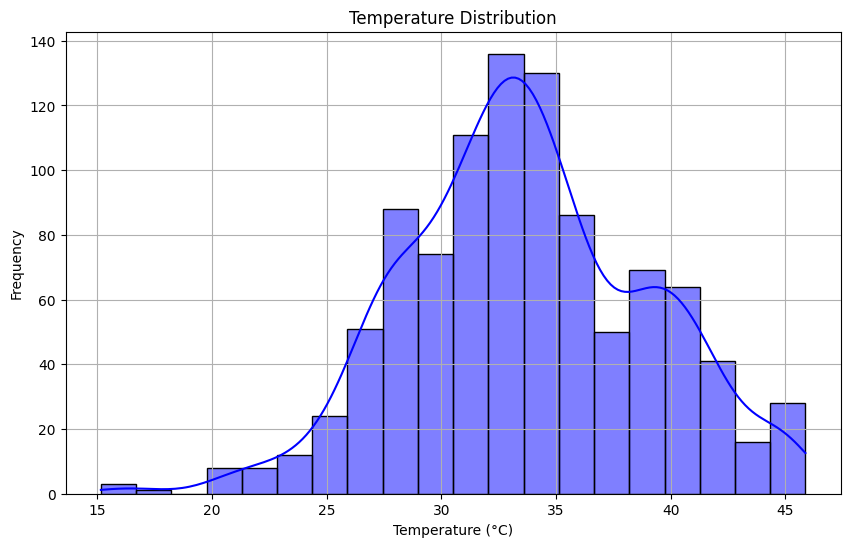

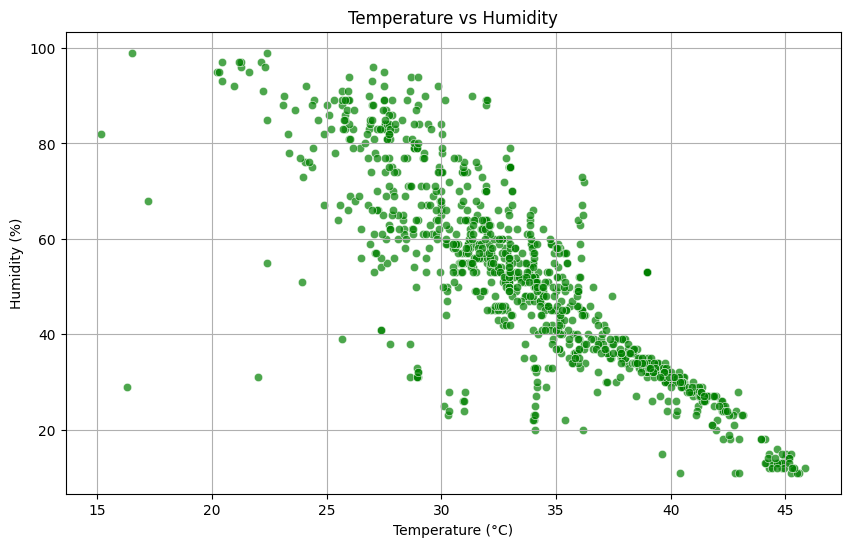

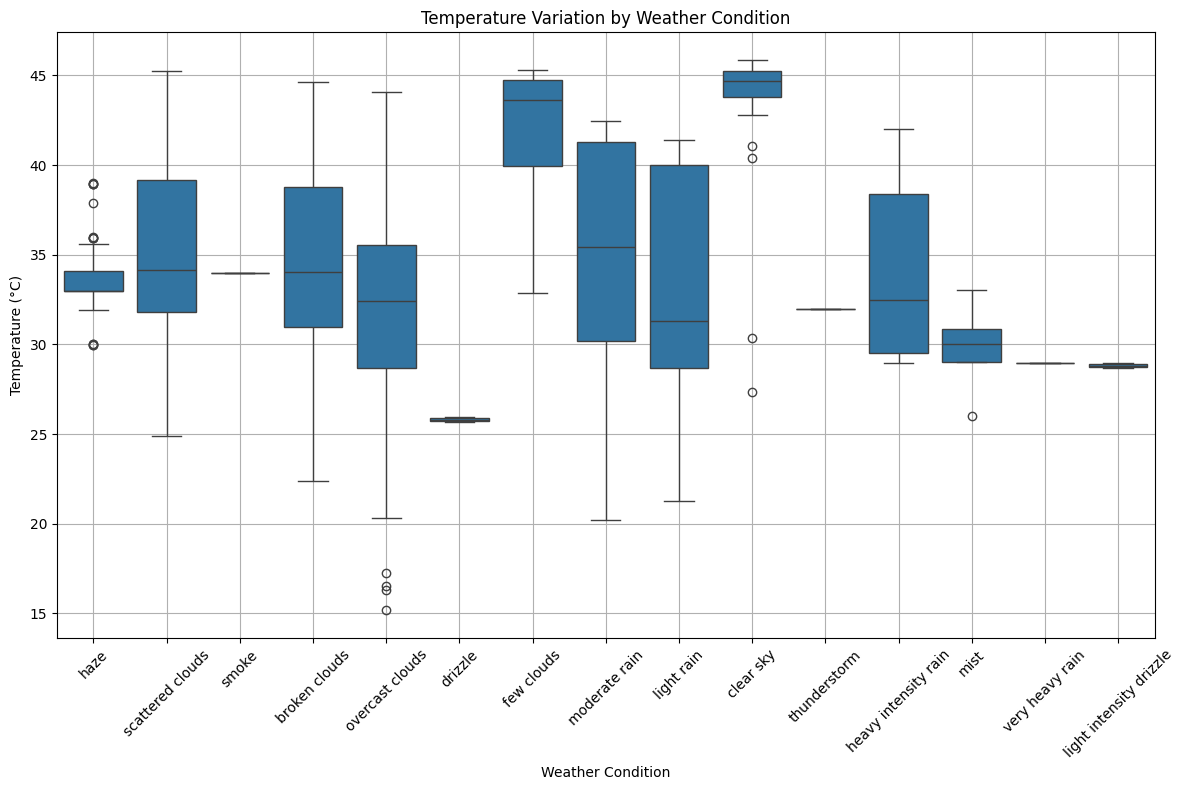

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Relationship between Temperature and Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=df, color='green', alpha=0.7)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Box plot of Temperature by Weather Condition
plt.figure(figsize=(12, 8))
sns.boxplot(x='Condition', y='Temperature', data=df)
plt.title('Temperature Variation by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
